# Data pre-processing

In [1]:
# Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data
df = pd.read_csv('results.txt')
df.columns = ['id', 'num', 'image', 'label', 'time']
df.drop(["num"], axis=1, inplace=True)

# Removal of outliers
print(len(df))
df.drop(df[df['time'] < 0.2].index, inplace=True)
df.drop(df[df['time'] > 3].index, inplace=True)
print(len(df))

# Normalization of reaction times for each person
df['mean'] = df.groupby('id')['time'].transform('mean')
df['min'] = df.groupby('id')['time'].transform('min')
df['max'] = df.groupby('id')['time'].transform('max')
df['normalized'] = (df['time']-df['min']) / (2*(df['max'] - df['min']))

df['SmileNorm'] = 1-df['normalized']
df['score'] = df['normalized']
df['score'][df['label'] == "Smiling"] = df['SmileNorm']

3962
3933


<ipython-input-1-c733e8f08c33>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'][df['label'] == "Smiling"] = df['SmileNorm']


In [2]:
df.head()

,id,image,label,time,mean,min,max,normalized,SmileNorm,score
0,7,55_1_0_20170103183939755.jpg.chip.jpg,Smiling,0.7776,0.826893,0.4476,2.2428,0.091912,0.908088,0.908088
1,7,42_1_0_20170105173320357.jpg.chip.jpg,Smiling,0.5956,0.826893,0.4476,2.2428,0.041221,0.958779,0.958779
2,7,26_1_1_20170112205848764.jpg.chip.jpg,Smiling,0.6308,0.826893,0.4476,2.2428,0.051025,0.948975,0.948975
3,7,28_0_3_20170113153014880.jpg.chip.jpg,Not smiling,0.6131,0.826893,0.4476,2.2428,0.046095,0.953905,0.046095
4,7,50_0_0_20170113184603160.jpg.chip.jpg,Not smiling,0.7651,0.826893,0.4476,2.2428,0.088430,0.911570,0.088430


Text(0.5, 0, 'Index')

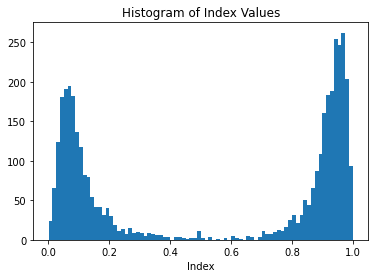

In [3]:
# Plotting histogram of index values
plt.title('Histogram of Index Values')
plt.hist(df['score'], bins = 80)
plt.xlabel('Index')

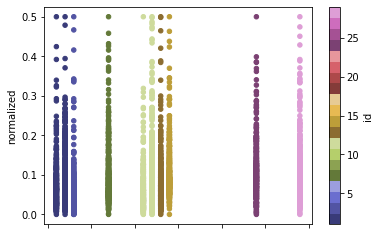

In [4]:
df.plot.scatter(x='id', y='normalized', c="id", cmap="tab20b")


In [6]:
#df.plot.scatter(x='num', y='normalized', c="id", cmap="tab20b", figsize=(15, 15))

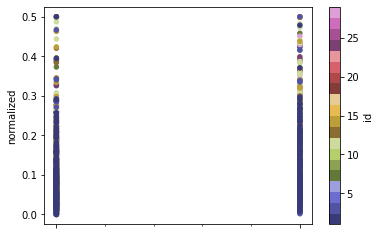

In [7]:
df.plot.scatter(x='label', y='normalized', c="id", cmap="tab20b")

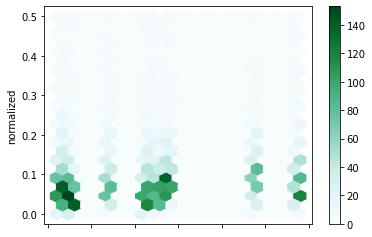

In [8]:
df.plot.hexbin(x='id', y='normalized', gridsize=20)

<ipython-input-9-16eda7219f33>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series = pd.Series(index=['id','normalized'], name="series")


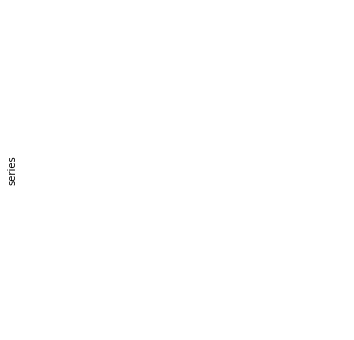

In [9]:
series = pd.Series(index=['id','normalized'], name="series")
series.plot.pie(figsize=(6, 6));

# PCA

In [10]:
###############################
# PCA and feature subtraction #
###############################

# Loading the mean image
import numpy as np
import glob
import cv2

images = [cv2.imread(file) for file in glob.glob("SampledPhotos/*.jpg.chip.jpg")]

# Subtracting the mean image 
len(images)

im = np.array(images)

images[0].shape

(200, 200, 3)

In [11]:
big_im = np.zeros([120000,len(images)])
for i in range(len(images)):
    big_im[:,i] = images[i].reshape(120000)

In [34]:
means = np.mean(big_im, axis=1)
means.shape

(120000,)

In [13]:
subtracted_mean = (big_im.T - means).T

In [32]:
from sklearn.decomposition import PCA

pca = PCA()
S = pca.fit_transform(subtracted_mean)
S.shape

(120000, 398)

In [35]:
A = pca.components_.T
A.shape

(398, 398)

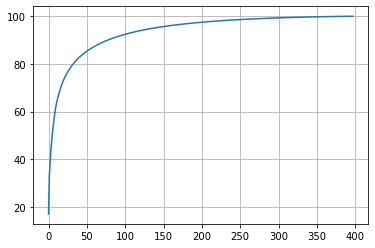

In [36]:
variance = pca.explained_variance_ratio_
import matplotlib.pyplot as plt
plt.grid()
plt.plot(np.cumsum(variance)*100)

In [50]:
pca_im = S[:,0].reshape([200,200,3])
pca_ims = S.reshape([200,200,3,len(images)])
pca_sub = ((means + S.T).T).reshape([200,200,3,len(images)])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

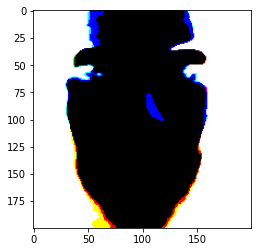

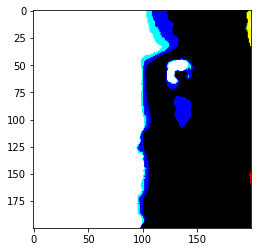

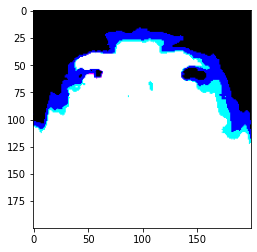

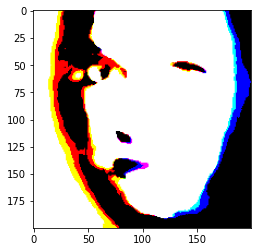

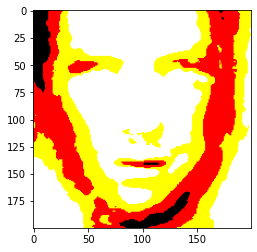

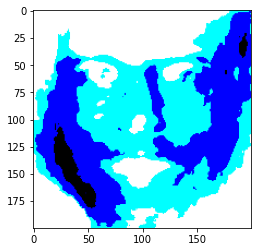

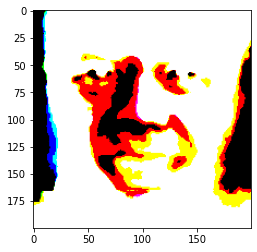

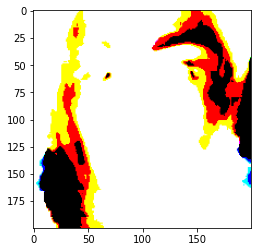

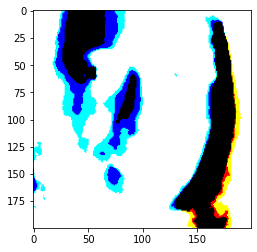

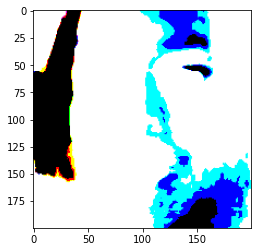

In [52]:
for i in range(10):
    plt.subplots()
    plt.imshow(pca_sub[:,:,:,i])

# 6

# Linear Model

# 8

# 9

# 10